# ADSC W4: The Battle of Neighborhoods w.1

## Introduction

The report will outline how I have attempted to solve the business problem of comparing neighborhood similarity in different cities - in this case New York and Toronto. In addition to serving as a reference when comparing data, a “comparability-index” would also allow individuals interested in moving to new countries quantify how similar or dissimilar other neighborhoods or cities are to their current place of living. Some may be more interested in moving to something familiar (i.e. high “comparability-index”) while others are looking for a change (i.e. low “comparability-index”). My hope is that this report will show the usefulness of such a comparison.

## Data

I will use data from Foursquare for both New York and Tornoto in order to simplify data collection and comparability.

In [1]:
#Install packages
!pip install lxml
!pip install BeautifulSoup4
!pip install requests
!pip install geopy
import pandas as pd
from bs4 import BeautifulSoup
import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import folium
from geopy.geocoders import Nominatim
print('Finished')

Finished


In [2]:
#Provide Foursquare credentials
CLIENT_ID = 'JNIRIZZ52DHRGIUWSCMQYVVIXMJBGS0BK5EPCNLN0YWVFLFF' # your Foursquare ID
CLIENT_SECRET = 'SQRC1WDUPVHEADITO4A3ZH11TSLM50KTQSUHOKWHLB3FMKNA' # your Foursquare Secret
ACCESS_TOKEN = 'IJP1LPLBBVM325HTPLZDNQAYRC3MJJUZ5XAANXFOSXXFQPFQ' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 10000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JNIRIZZ52DHRGIUWSCMQYVVIXMJBGS0BK5EPCNLN0YWVFLFF
CLIENT_SECRET:SQRC1WDUPVHEADITO4A3ZH11TSLM50KTQSUHOKWHLB3FMKNA


In [3]:
#Specify information for first city (in this case, New York)
address_ny = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location_ny = geolocator.geocode(address_ny)
latitude_ny = location_ny.latitude
longitude_ny = location_ny.longitude
print(latitude_ny, longitude_ny)

40.7127281 -74.0060152


In [4]:
#Define the search query, incl. radius and categoryId (in this case we're only seardching food venues)
search_query = ''
radius = 100000
categoryId= '4d4b7105d754a06374d81259'#Food category
print(search_query + ' .... OK!')

 .... OK!


In [5]:
#Create the URL we'll use for the first city
url_ny = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_ny, longitude_ny ,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT, categoryId)
url_ny

'https://api.foursquare.com/v2/venues/search?client_id=JNIRIZZ52DHRGIUWSCMQYVVIXMJBGS0BK5EPCNLN0YWVFLFF&client_secret=SQRC1WDUPVHEADITO4A3ZH11TSLM50KTQSUHOKWHLB3FMKNA&ll=40.7127281,-74.0060152&oauth_token=IJP1LPLBBVM325HTPLZDNQAYRC3MJJUZ5XAANXFOSXXFQPFQ&v=20180604&query=&radius=100000&limit=10000&categoryId=4d4b7105d754a06374d81259'

In [6]:
#Get the results for the first city
results_ny = requests.get(url_ny).json()
results_ny

{'meta': {'code': 200, 'requestId': '60472efa2c188b2f80a1ff45'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '5c08721481635b002c0a5784',
    'name': 'Fuku',
    'location': {'lat': 40.682972,
     'lng': -73.97569,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.682972,
       'lng': -73.97569}],
     'distance': 4185,
     'postalCode': '11217',
     'cc': 'US',
     'city': 'Brooklyn',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['Brooklyn, NY 11217', 'United States']},
    'categories': [{'id': '4d4ae6fc7a7b7dea34424761',
      'name': 'Fried Chicken Joint',
      'pluralName': 'Fried Chicken Joints',
      'shortName': 'Fried Chicken',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/friedchicken_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1615277819',
    'hasPerk': False},
   {'id': '579c12cd498e6e815b3acf50',
    'n

In [7]:
#Create a dataframe from the results
# assign relevant part of JSON to venues
venues_ny = results_ny['response']['venues']

# tranform venues into a dataframe
dataframe_ny = pd.json_normalize(venues_ny)
dataframe_ny.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,...,location.address,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,5c08721481635b002c0a5784,Fuku,"[{'id': '4d4ae6fc7a7b7dea34424761', 'name': 'F...",v-1615277819,False,40.682972,-73.975690,"[{'label': 'display', 'lat': 40.682972, 'lng':...",4185,11217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,579c12cd498e6e815b3acf50,Eataly Downtown,"[{'id': '4bf58dd8d48988d1f5941735', 'name': 'G...",v-1615277819,False,40.710075,-74.011976,"[{'label': 'display', 'lat': 40.710075, 'lng':...",583,10007,...,101 Liberty St,btwn Church & Greenwich St,2151287,https://www.seamless.com/menu/eataly-nyc-downt...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN
2,5f5e1b49af65ef27d803a4f0,The Tyger,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1615277819,False,40.718835,-73.999480,"[{'label': 'display', 'lat': 40.718835, 'lng':...",875,10013,...,1 Howard St,Centre St,2488929,https://www.seamless.com/menu/the-tyger-1-howa...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN
3,4fa2c66ae4b0dc1d01359ad5,WNYC Cafe,"[{'id': '4bf58dd8d48988d128941735', 'name': 'C...",v-1615277819,False,40.726449,-74.004947,"[{'label': 'display', 'lat': 40.72644854260348...",1530,10013,...,"160 Varick St, New York, NY 10013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4bb53e342ea19521503daa2f,Carvel,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",v-1615277819,False,40.757416,-73.845550,"[{'label': 'display', 'lat': 40.75741561666667...",14420,11368,...,Citi Field,126th St and Roosevelt Ave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Specify information for second city (in this case, Los Angeles)
address_ca = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location_ca = geolocator.geocode(address_ca)
latitude_ca = location_ca.latitude
longitude_ca = location_ca.longitude
print(latitude_ca, longitude_ca)

34.0536909 -118.242766


In [9]:
#Create the URL we'll use for the second city
url_ca = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_ca, longitude_ca ,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT, categoryId)
url_ca

'https://api.foursquare.com/v2/venues/search?client_id=JNIRIZZ52DHRGIUWSCMQYVVIXMJBGS0BK5EPCNLN0YWVFLFF&client_secret=SQRC1WDUPVHEADITO4A3ZH11TSLM50KTQSUHOKWHLB3FMKNA&ll=34.0536909,-118.242766&oauth_token=IJP1LPLBBVM325HTPLZDNQAYRC3MJJUZ5XAANXFOSXXFQPFQ&v=20180604&query=&radius=100000&limit=10000&categoryId=4d4b7105d754a06374d81259'

In [10]:
#Get the results for the second city
results_ca = requests.get(url_ca).json()
results_ca

{'meta': {'code': 200, 'requestId': '60472efc5e57225b3b7c5d6f'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '49f65012f964a5202f6c1fe3',
    'name': 'Grand Central Market',
    'location': {'address': '317 S Broadway',
     'crossStreet': 'btwn 3rd & 4th St',
     'lat': 34.050675036096266,
     'lng': -118.24874061147524,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.050675036096266,
       'lng': -118.24874061147524}],
     'distance': 645,
     'postalCode': '90013',
     'cc': 'US',
     'neighborhood': 'Downtown Los Angeles',
     'city': 'Los Angeles',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['317 S Broadway (btwn 3rd & 4th St)',
      'Los Angeles, CA 90013',
      'United States']},
    'categories': [{'id': '50be8ee891d4fa8dcc7199a7',
      'name': 'Market',
      'pluralName': 'Markets',
      'shortName': 'Market',
      'icon': {'prefix': 'https://ss3.4sqi

In [11]:
#Create a dataframe from the results
# assign relevant part of JSON to venues
venues = results_ca['response']['venues']

# tranform venues into a dataframe
dataframe_ca = pd.json_normalize(venues)
dataframe_ca.head(10)

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,49f65012f964a5202f6c1fe3,Grand Central Market,"[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",v-1615277820,False,317 S Broadway,btwn 3rd & 4th St,34.050675,-118.248741,"[{'label': 'display', 'lat': 34.05067503609626...",...,CA,United States,"[317 S Broadway (btwn 3rd & 4th St), Los Angel...",2058806,https://www.grubhub.com/restaurant/sticky-rice...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
1,604271bf4b035a771e4e9b39,Philz Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1615277820,False,9300 Culver Blvd,NaN,34.024631,-118.393483,"[{'label': 'display', 'lat': 34.024631, 'lng':...",...,CA,United States,"[9300 Culver Blvd, Culver City, CA 90232, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5cc4cb5a8c812a002ceb4c0d,Starbucks,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1615277820,False,Warner,Springdale,33.715097,-118.022420,"[{'label': 'display', 'lat': 33.715097, 'lng':...",...,CA,United States,"[Warner (Springdale), Huntington Beach, CA 926...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5d7711e0d1334200081e61b8,American Beauty,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",v-1615277820,False,425 Rose Ave,Fifth Ave,33.998023,-118.474517,"[{'label': 'display', 'lat': 33.998023, 'lng':...",...,CA,United States,"[425 Rose Ave (Fifth Ave), Venice, CA 90291, U...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4bdcb5202a3a0f477a0ab4b6,Far East Plaza,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",v-1615277820,False,734 N Broadway,NaN,34.061438,-118.239503,"[{'label': 'display', 'lat': 34.06143833505418...",...,CA,United States,"[734 N Broadway, Los Angeles, CA 90012, United...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4b60946ef964a520a2ee29e3,Winchell's Donut House,"[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",v-1615277820,False,18881 Colima Rd,Nogales,33.987904,-117.892382,"[{'label': 'display', 'lat': 33.98790441771161...",...,CA,United States,"[18881 Colima Rd (Nogales), Rowland Heights, C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3fd66200f964a52014f01ee3,Casa Vega,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1615277820,False,13301 Ventura Blvd,NaN,34.146835,-118.422693,"[{'label': 'display', 'lat': 34.14683529232314...",...,CA,United States,"[13301 Ventura Blvd, Sherman Oaks, CA 91423, U...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3fd66200f964a52092ee1ee3,In-N-Out Burger,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1615277820,False,9149 S Sepulveda Blvd,at W 92nd St,33.953658,-118.396897,"[{'label': 'display', 'lat': 33.95365824883238...",...,CA,United States,"[9149 S Sepulveda Blvd (at W 92nd St), Los Ang...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5375554911d2c45e456a9a69,Playa Provisions,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1615277820,False,119 Culver Blvd,NaN,33.957974,-118.449692,"[{'label': 'display', 'lat': 33.9579743738922,...",...,CA,United States,"[119 Culver Blvd, Playa del Rey, CA 90293, Uni...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4a8db18cf964a5208c1020e3,Puente Hills Mall,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",v-1615277820,False,1600 S Azusa Ave,at Colima Rd,33.993218,-117.927696,"[{'label': 'display', 'lat': 33.993218, 'lng':...",...,CA,United States,"[1600 S Azusa Ave (at Colima Rd), Industry, CA...",1431963,https://www.grubhub.com/restaurant/wetzels-pre...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN


In [12]:
#Combine the dataframes
df_concat = [dataframe_ny, dataframe_ca]
df_concatecate = pd.concat(df_concat)
df_concatecate

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,...,location.address,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,5c08721481635b002c0a5784,Fuku,"[{'id': '4d4ae6fc7a7b7dea34424761', 'name': 'F...",v-1615277819,False,40.682972,-73.975690,"[{'label': 'display', 'lat': 40.682972, 'lng':...",4185,11217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,579c12cd498e6e815b3acf50,Eataly Downtown,"[{'id': '4bf58dd8d48988d1f5941735', 'name': 'G...",v-1615277819,False,40.710075,-74.011976,"[{'label': 'display', 'lat': 40.710075, 'lng':...",583,10007,...,101 Liberty St,btwn Church & Greenwich St,2151287,https://www.seamless.com/menu/eataly-nyc-downt...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN
2,5f5e1b49af65ef27d803a4f0,The Tyger,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1615277819,False,40.718835,-73.999480,"[{'label': 'display', 'lat': 40.718835, 'lng':...",875,10013,...,1 Howard St,Centre St,2488929,https://www.seamless.com/menu/the-tyger-1-howa...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN
3,4fa2c66ae4b0dc1d01359ad5,WNYC Cafe,"[{'id': '4bf58dd8d48988d128941735', 'name': 'C...",v-1615277819,False,40.726449,-74.004947,"[{'label': 'display', 'lat': 40.72644854260348...",1530,10013,...,"160 Varick St, New York, NY 10013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4bb53e342ea19521503daa2f,Carvel,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",v-1615277819,False,40.757416,-73.845550,"[{'label': 'display', 'lat': 40.75741561666667...",14420,11368,...,Citi Field,126th St and Roosevelt Ave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,57cb2aeb498e50ae9e628a01,Herst Coffee Roasters,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1615277821,False,33.618340,-117.928447,"[{'label': 'display', 'lat': 33.61834017019721...",56509,92663,...,3400 Via Lido Ste B,at Via Opporto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,575a03bb498e948231abb9e1,Starbucks,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1615277821,False,34.046120,-118.376188,"[{'label': 'display', 'lat': 34.04611963984450...",12334,90035,...,1742 S. La Cienega,Airdrome St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,4b1bfe8ff964a5205a0024e3,Starbucks,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1615277821,False,34.003459,-118.472003,"[{'label': 'display', 'lat': 34.00345918, 'lng...",21875,90405,...,3020 Lincoln Blvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,4cd8b1637d4546882d23eded,Costco Food Court,"[{'id': '4bf58dd8d48988d120951735', 'name': 'F...",v-1615277821,False,33.992730,-118.446490,"[{'label': 'display', 'lat': 33.99273023502508...",19983,90292,...,13463 Washington Blvd,at Glencoe Ave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Extract information from the category column

#keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_concatecate.columns if col.startswith('location.')] + ['id']
dataframe_filtered = df_concatecate.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,neighborhood,id
0,Fuku,Fried Chicken Joint,40.682972,-73.975690,"[{'label': 'display', 'lat': 40.682972, 'lng':...",4185,11217,US,Brooklyn,NY,United States,"[Brooklyn, NY 11217, United States]",NaN,NaN,NaN,5c08721481635b002c0a5784
1,Eataly Downtown,Gourmet Shop,40.710075,-74.011976,"[{'label': 'display', 'lat': 40.710075, 'lng':...",583,10007,US,New York,NY,United States,"[101 Liberty St (btwn Church & Greenwich St), ...",101 Liberty St,btwn Church & Greenwich St,NaN,579c12cd498e6e815b3acf50
2,The Tyger,Asian Restaurant,40.718835,-73.999480,"[{'label': 'display', 'lat': 40.718835, 'lng':...",875,10013,US,New York,NY,United States,"[1 Howard St (Centre St), New York, NY 10013, ...",1 Howard St,Centre St,NaN,5f5e1b49af65ef27d803a4f0
3,WNYC Cafe,Cafeteria,40.726449,-74.004947,"[{'label': 'display', 'lat': 40.72644854260348...",1530,10013,US,New York,NY,United States,"[160 Varick St, New York, NY 10013, New York, ...","160 Varick St, New York, NY 10013",NaN,NaN,4fa2c66ae4b0dc1d01359ad5
4,Carvel,Ice Cream Shop,40.757416,-73.845550,"[{'label': 'display', 'lat': 40.75741561666667...",14420,11368,US,Flushing,NY,United States,"[Citi Field (126th St and Roosevelt Ave), Flus...",Citi Field,126th St and Roosevelt Ave,NaN,4bb53e342ea19521503daa2f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Herst Coffee Roasters,Coffee Shop,33.618340,-117.928447,"[{'label': 'display', 'lat': 33.61834017019721...",56509,92663,US,Newport Beach,CA,United States,"[3400 Via Lido Ste B (at Via Opporto), Newport...",3400 Via Lido Ste B,at Via Opporto,NaN,57cb2aeb498e50ae9e628a01
46,Starbucks,Coffee Shop,34.046120,-118.376188,"[{'label': 'display', 'lat': 34.04611963984450...",12334,90035,US,Los Angeles,CA,United States,"[1742 S. La Cienega (Airdrome St), Los Angeles...",1742 S. La Cienega,Airdrome St,NaN,575a03bb498e948231abb9e1
47,Starbucks,Coffee Shop,34.003459,-118.472003,"[{'label': 'display', 'lat': 34.00345918, 'lng...",21875,90405,US,Santa Monica,CA,United States,"[3020 Lincoln Blvd, Santa Monica, CA 90405, Un...",3020 Lincoln Blvd,NaN,NaN,4b1bfe8ff964a5205a0024e3
48,Costco Food Court,Food Court,33.992730,-118.446490,"[{'label': 'display', 'lat': 33.99273023502508...",19983,90292,US,Marina del Rey,CA,United States,"[13463 Washington Blvd (at Glencoe Ave), Marin...",13463 Washington Blvd,at Glencoe Ave,NaN,4cd8b1637d4546882d23eded


In [14]:
#Filter columns
columns_to_keep = ['name','categories','address','lat','lng','city','state']
df_filtered = dataframe_filtered.loc[:, columns_to_keep]

# display tips
df_filtered.reindex()

,name,categories,address,lat,lng,city,state
0,Fuku,Fried Chicken Joint,NaN,40.682972,-73.975690,Brooklyn,NY
1,Eataly Downtown,Gourmet Shop,101 Liberty St,40.710075,-74.011976,New York,NY
2,The Tyger,Asian Restaurant,1 Howard St,40.718835,-73.999480,New York,NY
3,WNYC Cafe,Cafeteria,"160 Varick St, New York, NY 10013",40.726449,-74.004947,New York,NY
4,Carvel,Ice Cream Shop,Citi Field,40.757416,-73.845550,Flushing,NY
...,...,...,...,...,...,...,...
45,Herst Coffee Roasters,Coffee Shop,3400 Via Lido Ste B,33.618340,-117.928447,Newport Beach,CA
46,Starbucks,Coffee Shop,1742 S. La Cienega,34.046120,-118.376188,Los Angeles,CA
47,Starbucks,Coffee Shop,3020 Lincoln Blvd,34.003459,-118.472003,Santa Monica,CA
48,Costco Food Court,Food Court,13463 Washington Blvd,33.992730,-118.446490,Marina del Rey,CA


In [15]:
df_filtered

,name,categories,address,lat,lng,city,state
0,Fuku,Fried Chicken Joint,NaN,40.682972,-73.975690,Brooklyn,NY
1,Eataly Downtown,Gourmet Shop,101 Liberty St,40.710075,-74.011976,New York,NY
2,The Tyger,Asian Restaurant,1 Howard St,40.718835,-73.999480,New York,NY
3,WNYC Cafe,Cafeteria,"160 Varick St, New York, NY 10013",40.726449,-74.004947,New York,NY
4,Carvel,Ice Cream Shop,Citi Field,40.757416,-73.845550,Flushing,NY
...,...,...,...,...,...,...,...
45,Herst Coffee Roasters,Coffee Shop,3400 Via Lido Ste B,33.618340,-117.928447,Newport Beach,CA
46,Starbucks,Coffee Shop,1742 S. La Cienega,34.046120,-118.376188,Los Angeles,CA
47,Starbucks,Coffee Shop,3020 Lincoln Blvd,34.003459,-118.472003,Santa Monica,CA
48,Costco Food Court,Food Court,13463 Washington Blvd,33.992730,-118.446490,Marina del Rey,CA


In [16]:
import folium

map_ny = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=15)
locations = folium.map.FeatureGroup()
# add markers to map
for lat, lng in zip(df_filtered['lat'], df_filtered['lng']):
    locations.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
map_ny.add_child(locations)

In [17]:
#Group by state
df_group_one = df_filtered[['state','categories']]
df_group_one

,state,categories
0,NY,Fried Chicken Joint
1,NY,Gourmet Shop
2,NY,Asian Restaurant
3,NY,Cafeteria
4,NY,Ice Cream Shop
...,...,...
45,CA,Coffee Shop
46,CA,Coffee Shop
47,CA,Coffee Shop
48,CA,Food Court


In [18]:
#Foursquare appears to use different naming for the state - rename to ensure consistency
df_group_one['state']=df_group_one['state'].replace(['New York'],'NY')
df_group_one['state']=df_group_one['state'].replace(['California'],'CA')
df_group_one = df_group_one.loc[df_group_one['state'].isin(['NY','CA'])]
df_group_one

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,categories
0,NY,Fried Chicken Joint
1,NY,Gourmet Shop
2,NY,Asian Restaurant
3,NY,Cafeteria
4,NY,Ice Cream Shop
...,...,...
45,CA,Coffee Shop
46,CA,Coffee Shop
47,CA,Coffee Shop
48,CA,Food Court


In [19]:
#Create a pivot table from the grouped dataframe with the count of each category for each state
grouped_pivot = df_group_one.pivot_table(index='categories',columns='state',aggfunc=len)
grouped_pivot

state,CA,NY
categories,,
American Restaurant,1.0,2.0
Asian Restaurant,NaN,1.0
BBQ Joint,1.0,NaN
Bagel Shop,NaN,1.0
Bakery,NaN,3.0
Bubble Tea Shop,NaN,1.0
Burger Joint,1.0,1.0
Cafeteria,NaN,1.0
Café,5.0,1.0


In [30]:

df_group_one['categories'].loc[df_group_one['state'].isin(['CA'])].unique().shape

(20,)

In [20]:
#Replace NaN with 0's
grouped_pivot=grouped_pivot.fillna(0)
grouped_pivot

state,CA,NY
categories,,
American Restaurant,1.0,2.0
Asian Restaurant,0.0,1.0
BBQ Joint,1.0,0.0
Bagel Shop,0.0,1.0
Bakery,0.0,3.0
Bubble Tea Shop,0.0,1.0
Burger Joint,1.0,1.0
Cafeteria,0.0,1.0
Café,5.0,1.0


In [21]:
#Filter out categories where the difference in categories is less than 3
new_df=grouped_pivot.loc[abs(grouped_pivot['NY']-grouped_pivot['CA'])>1]
new_df

state,CA,NY
categories,,
Bakery,0.0,3.0
Café,5.0,1.0
Coffee Shop,14.0,8.0
Fast Food Restaurant,6.0,0.0
Ice Cream Shop,0.0,2.0
Shopping Mall,3.0,0.0


# Visualize and analyze data

<AxesSubplot:xlabel='categories'>

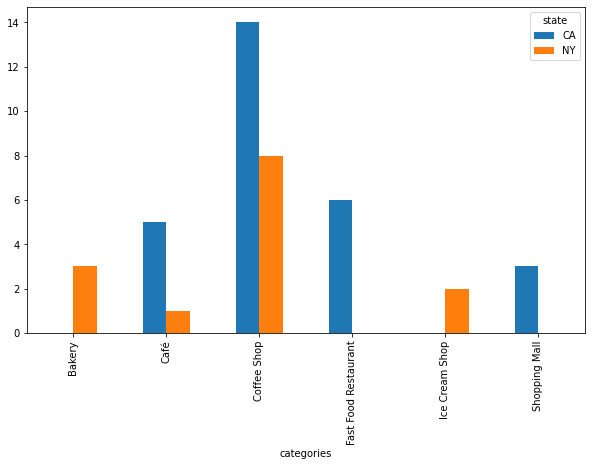

In [22]:
new_df.plot(kind='bar', figsize=(10, 6),)

It appears that New York is the place to visit if you are looking for coffee shops or fast food (and pizza & sandwiches), while Los Angeles has more japaneese and sushi restaurants, and food trucks 